In [2]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt


In [3]:
df = pd.read_pickle('./data_final.pkl') #importing cleaned data from the other file

In [10]:
station_flow_annual = df.groupby(by = 'Station')['Net_Flow'].sum()
station_flow_annual.sort_values(ascending = False,inplace = True)

stations_name = station_flow_annual.index[:10].tolist()
stations_size = station_flow_annual[:10]

In [5]:
df_location = pd.read_csv('~/Documents/Github/Strategic_placements_of_resources/Strategic_placements_of_resources/data/external/StationEntrances.csv')

In [6]:
df_location.head()

,Division,Line,Station_Name,Station_Latitude,Station_Longitude,Route_1,Route_2,Route_3,Route_4,Route_5,...,Staffing,Staff_Hours,ADA,ADA_Notes,Free_Crossover,North_South_Street,East_West_Street,Corner,Latitude,Longitude
0,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NW,40.775149,-73.912074
1,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NE,40.774810,-73.912151
2,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NE,40.775025,-73.911891
3,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NW,40.774938,-73.912337
4,BMT,Astoria,Astoria Blvd-Hoyt Av,40.770258,-73.917843,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,Hoyt Ave South,SW,40.770313,-73.917978


In [24]:
location = pd.DataFrame(
                    df_location.groupby(by = 'Station_Name')[['Station_Latitude','Station_Longitude']].mean()).reset_index()

In [50]:
location.head()

,Station_Name,Station_Latitude,Station_Longitude
0,103rd St,40.781165,-73.929092
1,104th St-102nd St,40.695178,-73.844330
2,104th St-Oxford Av,40.681711,-73.837683
3,110th St,40.795020,-73.944250
4,110th St-Central Park North,40.799075,-73.951822


In [38]:
data = {'Station_Flow':stations_size}
stations = pd.DataFrame(data = data).reset_index()

In [46]:
station_dict = {'TIMES SQ-42 ST':'Times Square-42nd St','23 ST':'23rd St','GRD CNTRL-42 ST':'Grand Central-42nd St',
               '14 ST-UNION SQ':'14th St-Union Square','FULTON ST':'Fulton St','86 ST':'86th St','125 ST':'125th St',
               "42 ST-PORT AUTH":"42th St-Port Authority",'34 ST-PENN STA':'34th St-Penn','34 ST-HERALD SQ':'34th St-Herald Sq'}

In [48]:
stations.Station.replace(station_dict,inplace = True)

In [51]:
Station_loca = stations.merge(location,how='left',left_on = 'Station',right_on = 'Station_Name')

In [63]:
Station_loca.loc[Station_loca['Station'] == '34th St-Penn', 'Station_Latitude'] = 1

In [69]:
station_to_fill = ['34th St-Penn','34th St-Herald Sq','42th St-Port Authority']
lat_2fill = [40.752342 , 40.749936 , 40.757965]
lon_2fill = [-73.9932 , -73.988050,-73.991302]

for i in range(3):
    Station_loca.loc[Station_loca['Station'] == station_to_fill[i], 'Station_Latitude'] = lat_2fill[i]
    Station_loca.loc[Station_loca['Station'] == station_to_fill[i], 'Station_Longitude'] = lon_2fill[i]

In [79]:
columns_to_keep = [ 'Station','Station_Flow','Station_Latitude','Station_Longitude']
Stations = pd.DataFrame(Station_loca[columns_to_keep])

Stations.Station_Flow = Stations.Station_Flow/1000000*30

In [83]:
Bbox = (Stations.Station_Longitude.min(),   Stations.Station_Longitude.max(),      
         Stations.Station_Latitude.min(), Stations.Station_Latitude.max())
Bbox

(-74.0041218235294, -73.94828926315786, 40.70741094117648, 40.809509684210546)

(-73.945, -74.01)

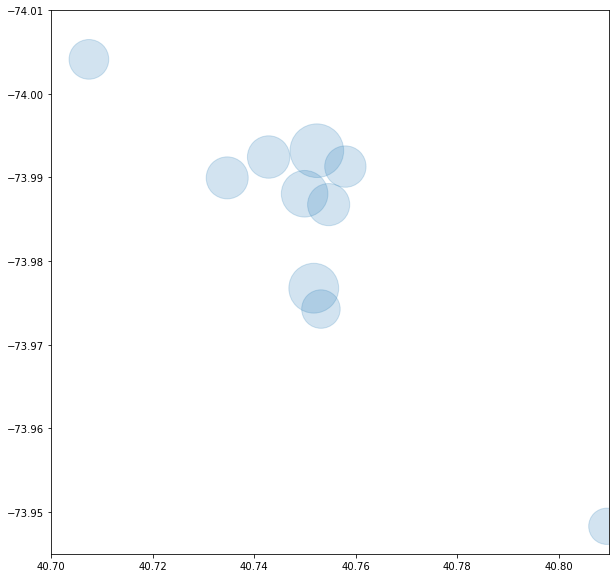

In [89]:
plt.figure(figsize=[10,10])
plt.scatter(x = Stations.Station_Latitude,y=Stations.Station_Longitude,s = Stations.Station_Flow,alpha = .2)
plt.xlim([40.7,40.81])
plt.ylim([-73.945,-74.01])